# **Tools in Neural Networks**
Here we will describe few fundamental tools commonly used when developing a neural network models. In particular, we will discuss about *activation functions, loss functions, optimizers* and *metrics*.

## **Activation Functions**
Any activation function in a neural network has the purpose of *transform* the incoming data into a different representation of it. More specifically, the activation functions act every time that our data passes from the one layer to the following. The data is represented as a **weighted sum** $$y_j = \sum_{i=0}^{N_{nodes}} w_{i,j}x_i \;,$$ where $j$ identifies the $j-th$ node in the output layer. 
What we wrote is a simply a **linear** procedure, meaning that we can add any number of layers with this transformation, but the final output will remain a *linear transformation* of the initial data.
Of course, this is used in linear regressions, where we only need a linear weights dependence; however, for any other scenario - the majority - we must add a *non-linear* behavior to the neural network. This is achieved by adding the **activation function** that we will call $sigma(\vec{y})$.

In some cases it is also important to evaluate the derivative of the activation function, in order to be able to update the weights with the **backpropagation** method.

There are many types of activations functions, we list the most common ones below:

### **1. Sigmoid**
The sigmoid transformation allows a normalization of the input data, which may be extremely useful when evaluating the probability of an outcome.
$$\sigma(y_j)=\dfrac{1}{1+\exp(-\sum_{i=0}^{N_{nodes}} w_{i,j}x_i)}\;,$$
where we specified the input value as the summation. Its derivative is:
$$\dfrac{d \sigma(y_j)}{d y_j}=\sigma(y_j) (1-\sigma(y_j))\;.$$


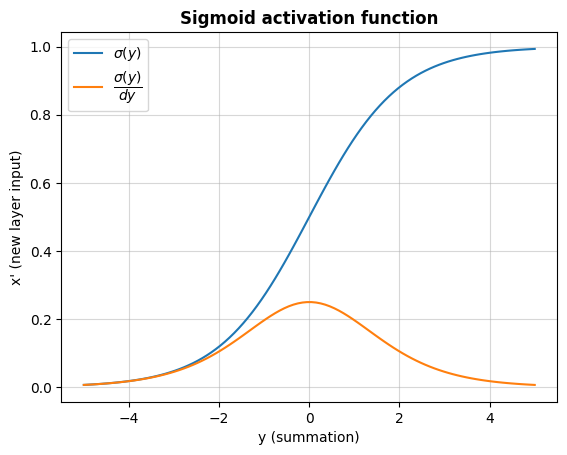

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return (1/(1+np.exp(-x)))

x = np.linspace(-5,5,100)
y = sigmoid(x)
y_der = sigmoid(x)*(1-sigmoid(x))

plt.plot(x, y, label=r'$\sigma(y)$')
plt.plot(x, y_der, label=r"$\dfrac{\sigma(y)}{dy}$")
plt.title('Sigmoid activation function', fontweight='bold')
plt.xlabel('y (summation)')
plt.ylabel("x' (new layer input)")
plt.legend()
plt.grid(alpha=0.5)
plt.show()

### **2. Hyperbolic Tangent**
This function is quite useful in many cases. Let's start by observing that the output is contained within $[-1,1]$, which again suits well cases in which our results should be contained in a specific range, like classifications problems.
It is again a smooth function, meaning that we can evaluate its derivative and update weights with the backproagation procedure. It can be written as:
$$\sigma(y_j)=\dfrac{e^{y_j}-e^{-y_j}}{e^{y_j}+e^{-y_j}}\;,$$
where we recall $y_i$ being the summation on the $j-th$ node. Its derivative is:
$$\dfrac{d \sigma(y_j)}{d y_j}=1-\sigma(y_j)^2\;.$$

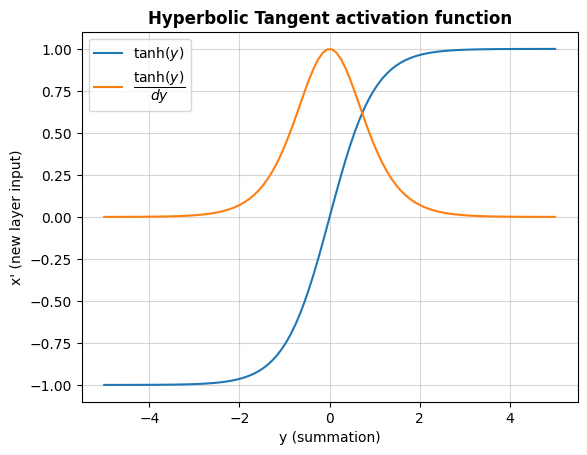

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def h_tan(x):
    return np.tanh(x)

x = np.linspace(-5,5,100)
y = h_tan(x)
y_der = 1-h_tan(x)**2

plt.plot(x, y, label=r'$\tanh(y)$')
plt.plot(x, y_der, label=r"$\dfrac{\tanh(y)}{dy}$")
plt.title('Hyperbolic Tangent activation function', fontweight='bold')
plt.xlabel('y (summation)')
plt.ylabel("x' (new layer input)")
plt.legend()
plt.grid(alpha=0.5)
plt.show()

### **3. ReLU**
ReLU activation function is a bit different from the others. It is an extremely used function defined as:
\begin{align*}
\sigma(y_j)=
\begin{cases}
0\, , \; &\text{if } x\leq0 \\
y_j\, , \; &\text{if } x>0
\end{cases}\;.
\end{align*}
It's clear that the function is differentiable at $y=0$, in fact:
\begin{align*}
\dfrac{d \sigma(y_j)}{d y_j}=
\begin{cases}
0\, , \; &\text{if } x<0 \\
1\, , \; &\text{if } x>0 \\
\text{undefined}\, , \; &\text{if } x=0 
\end{cases}\;,
\end{align*}
but usually we set a different value at that point, i.e. $0$ or $1$.

We notice from the derivative that we can end up in a phenomenon called *dying relu*, where a node in the neural network stops updating due to the *zero* gradient. This is not optimal, and there are many variants of the ReLU to correct this behavior. However, in many cases we can simply use it as it is, since it is very fast.

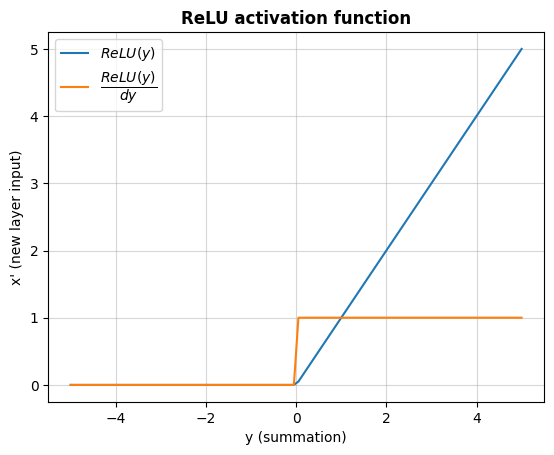

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    val = 0
    if x >=0:
        val=x
    else:
        pass
    return val

def d_relu(x):
    val = 0
    if x >=0:
        val=1
    else:
        pass
    return val

x = np.linspace(-5,5,100)
y = [relu(i) for i in x]
y_der = [d_relu(i) for i in x]

plt.plot(x, y, label=r'$ReLU(y)$')
plt.plot(x, y_der, label=r"$\dfrac{ReLU(y)}{dy}$")
plt.title('ReLU activation function', fontweight='bold')
plt.xlabel('y (summation)')
plt.ylabel("x' (new layer input)")
plt.legend()
plt.grid(alpha=0.5)
plt.show()

# **Loss Function**
The loss $L$ function is a mathematical tool that is used to evaluate the difference between the **predicted** output and the **target** one, which can also be defined in *unsupervised learning*. We can write the loss function in many different ways, depending on our needs; in general, the most common ones are: **Mean Squared Error**, **Binary Cross-Entropy** and **Categorical Cross-Entropy**. 

### **1. Mean Squared Error**
This is the first loss function we usually introduce when presenting neural networks. It is a very well known quantity used in many fields, and it is defined as:
$$L = L(\vec{y},\hat{\vec{y}}(\vec{w})) = \dfrac{1}{M}\,\sum_{i=1}^M (y_i-\hat{y_i}(\vec{w}))^2 \; ,$$
where $\vec{y}$ and $\vec{\hat{y}}$ are the targets and the predicted outcomes respectively. It is important to highlight the dependence of $\hat{\vec{y}}$ on the *weights* $\vec{w}$, because they will come out from the *chain rule* when using the **backpropagation** procedure during the weight update. Finally, $M$ is the number of nodes in the considered layer.

This quantity is used for many tasks, in particular *regression problems*, but it is generally quite flexible.

### **2. Binary Cross-Entropy**
This loss function is the one to use in *binary classification problems*, where the output is divided only into "yes"/"no" outcomes, which in statistical terms is simply $0$ or $1$. This last observation is the ones that makes the binary cross-entropy extremely powerful, since it is defiend as:
$$L(y,\hat{y}) = -(y\cdot\log{\hat{y}(\vec{w})} + (1-y)\cdot\log{(1-\hat{y}(\vec{w}))})\; ,$$
where $y$ is the target and $\hat{y}$ is the predicted output. Now, since $y \in \{0,1\}$, we understand that $\hat{y}$ should be evaluated with **normalized** algorithms, for instance using the **sigmoid** activation function. In addition, whenever the prediction is way off the mark - i.e. if $\hat{y}=1-y$ - then we have to add a small additive constant in the logarithm, otherwise we would get $L=-\infty$.

### **3. Categorical Cross-Entropy**
This is the generalization of the *binary cross-entropy* to $M$ different categories, which is the usual case of image recognition tasks. In particular, we define the final output layer with $M$ nodes, each one representing a specific category. The value of the node will correspond the **likelihood** of the analyzed object belonging to that category, and for this reason we would like to have a final activation function that transform each output in the $[0,1]$ range.
In general, we shouldn't expect always to have extremely high likelihoods $(>0.9)$, but we are typically interested only in the *highest* value.

The **categorical cross-entropy** is defined as:
$$L(\vec{y}, \vec{\hat{y}}) = -\sum_{i=1}^M y_i\,\log(\hat{y}_j(\vec{w}))\;,$$
which for two categories gives back exactly the binary cross-entropy. Here, $y_i$ is the actual probability for an object to be in the $i$-th category, while $\hat{y}_i$ is the predicted one.

## **Optimizers**
Optimizers are algorithms that allow the weight update and/or the learning rate calculation. An optimizer should be able to reach the **optimal** solution - given a dataset - in the least amount of time, without being stuck in **local minima** nor oscillating within the solution basin.

There are many types of optimizers, for instance **Gradient Descent**, **Stochastic Gradient Descent**, **Mini-Batch Gradient Descent**, **GD + Momentum** and **Adam**. We will just give the formal definition of each of the ones mentioned, but in general we will always use **Adam** optimizer.

### **1. Gradient Descent**
This is by far the easiest optimizer there is, since it is only the application of the *first order derivative* of the *loss function*. In fact, we define the gradient descent as:
$$\vec{w}_{n+1} = \vec{w}_n - \eta \, \nabla_{\vec{w}} \, L(\vec{y},\hat{\vec{y}}(\vec{w}_n))\; ,$$
where $L$ is the loss function and $\eta$ is the *learning rate* hyperparameter. Now we understand why we need the *activation function derivative*, since we have to evaluate it due to the **chain rule** when applying the gradient to $\hat{y}_j = \sigma(\sum_{i=0}^{N_{nodes}} w_{i,j}\, x_i)$. The *weight update* procedure ends when the values of the new weights are close enough to the previous ones, in mathematical terms:
$$w^{(i)}_{n+1}-w^{(i)}_{n} \leq T\,,\; \forall i\;,$$
where $T$ is a pre-defined threshold.

This method is useful to understand the concept of weights update in a neural network, but it is not always the most reliant. In fact:
- Gradient descent updates the weights by considering the error accumulated over all the training samples, which is very slow for large datasets.
- The convergence to the optimal weights values can be extremely slow if the step - $\eta$ is too small, but we can also don't have convergence if it is too large.
- Most importantly, we might get stuck into **local minima**, and not the global ones. This because we simply follow the gradient direction, and in local minima it points to their besin.

With **Stochasti Gradient Descent** we mean the exactly the same procedure, but the weights are update for *every* new randomly picked object from the dataset. This speeds up the procedure by a lot, but it is clearly very prone to *noise*. For this reason, we usually use different variants of the gradient descent.

### **2. Mini-batch Gradient Descent**
This optimizer adjust the sizes of the sample that is used to update the weights. In some sense, it is exactly as the *stochastic gradient descent*, but it uses a larger batch size. The issues and advantages with this algorithm are the same as the gradient descent, we simply reduce the computational power required to update the weight. We are not going to talk any longer about this optimizer, since there are many others that are better.

### **3. Gradient Descent + Momentum**
The concept of **momentum** is actually self explanatory: in order to update the weights, we want to consider the "weight" of the *previous* weights update, thus the word momentum, since we influence the next step with the direction of the previous one. This can be written as:
$$\vec{w}_{n+1} = \vec{w}_n + \mu (\vec{w}_n-\vec{w}_{n-1}) - \eta \, \nabla_{\vec{w}} \, L(\vec{y},\hat{\vec{y}}(\vec{w}_n))\; ,$$
with $\mu (\vec{w}_n-\vec{w}_{n-1})$ beign the momentum term tuned by the parameter $\mu$.

Again, since we are using the plain gradient descent this algorithm is not particularly efficient. Much better is to use the **stochastic gradient descent** together with the momentum introduction, which is actually a commonly used optimizer for many tasks.

### **4. Adam**
Adam optimizer is probably the one to used in $99\%$ of real life scenarios. Adam stands for **Adaptive Moment Estimation**, which combines algorithms that we have seen with some new ideas. It is quite articulated from an algorithm point of view, we shall try to follow it with the definition:
\begin{aligned}
\begin{cases}
\vec{w}^{(i)}_{n+1} &= \vec{w}^{(i)}_n - \alpha \,\dfrac{\hat{m}^{(i)}_n}{\sqrt{\hat{v}^{(i)}_n} + \epsilon} \\
m^{(i)}_n &= \beta_1 m^{(i)}_{n-1} + (1 - \beta_1)\, g^{(i)}_n \\
v^{(i)}_n &= \beta_2 v^{(i)}_{n-1} + (1 - \beta_2)\, \left({g_n^{(i)}}\right)^{2} \\
g^{(i)}_n &= \left(\nabla_{\vec{w}} \, L(\vec{y},\hat{\vec{y}}(\vec{w}_n))\right)_i\\
\hat{m}^{(i)}_n &= \dfrac{m^{(i)}_n}{1 - \beta_1^n} \\
\hat{v}^{(i)}_n &= \dfrac{v^{(i)}_n}{1 - \beta_2^n}
\end{cases}\;.
\end{aligned}
First, let's notice that this is for updating the $i$-th weight of the model; the procedure can be easily vecotrized, but it's clearer - for how odd it sounds - like this.
We understand the complexity of the algorithm, again we need the gradient of the loss function, then we observe that the contributions to the update $\hat{m}^{(i)}_n$ and $\hat{v}^{(i)}_n$ are reduced exponentially as the steps progress. The parameter $\epsilon$ is just a constant that prevents the denominator to be zero, since the initial values of both $\hat{m}^{(i)}_0$ and $\hat{v}^{(i)}_0$ are set to zero. It also has a **momentum** component, which we already saw.

Adam algorithm is usually the preferred one because:
- Fast convergence: even for large scale dataset, adam convergence is faster than most algorithms.
- Memory efficient: Althought it seems articulated, the number of variables stored in memory is quite limited, which it allows to process larger datasets.
- Unlikely to be trapped in local minima: thanks to the **momentum** and the **adaptive learning rate** it is unlikely that adam optimizer gets stuck in local minima, even if this can still happen for particular cases.

There are instead few disadvantages to adam optimizer, for instance overfitting susceptibility in some cases, but in general this is the optimizer to beat when analyzing new systems. 